# Testing of the visualization

This example will show the basic usage of the visualization tool as well as more advanced usage in the end. 

We start by importing the necessary libraries and the visualization tool.

In [1]:
# imports
import pandas as pd
import numpy as np
import models.robot_visualizer.robot_visualizer as rv

# Create a visualizer object
vis = rv.RobotVisualizer()

## Test of visualizing the movement to a single point

This section shows how to visualize the movement to a single point in the 3D application.

We start by spawning the application

In [2]:
vis.start_application()

Visualization Application Started


This will spawn the application, and **you need to manually input the port number** specified in the config file (default to 5556).

Next, we will test the visualization of the movement to a single point.

In [3]:
pos = [3.5, -1.1, 2.1, -2.5, -1.7, 1.3]
vis.publish_joint_positions(pos)

This should show the robot moving to the point given position. 

## Test of visualizing the movements in a full trajectory

We load an example trajectory from the ````data/dt_data```` folder. This is a trajectory generated by the kinematic model and is saved in the ```.npy``` format, which is a numpy array.

In [4]:
# load example trajectory
traj = np.load('../../data/dt_data/generated_traj_example.npy')

We use the method ````plot_trajectory_2d```` to visualize the trajectory.

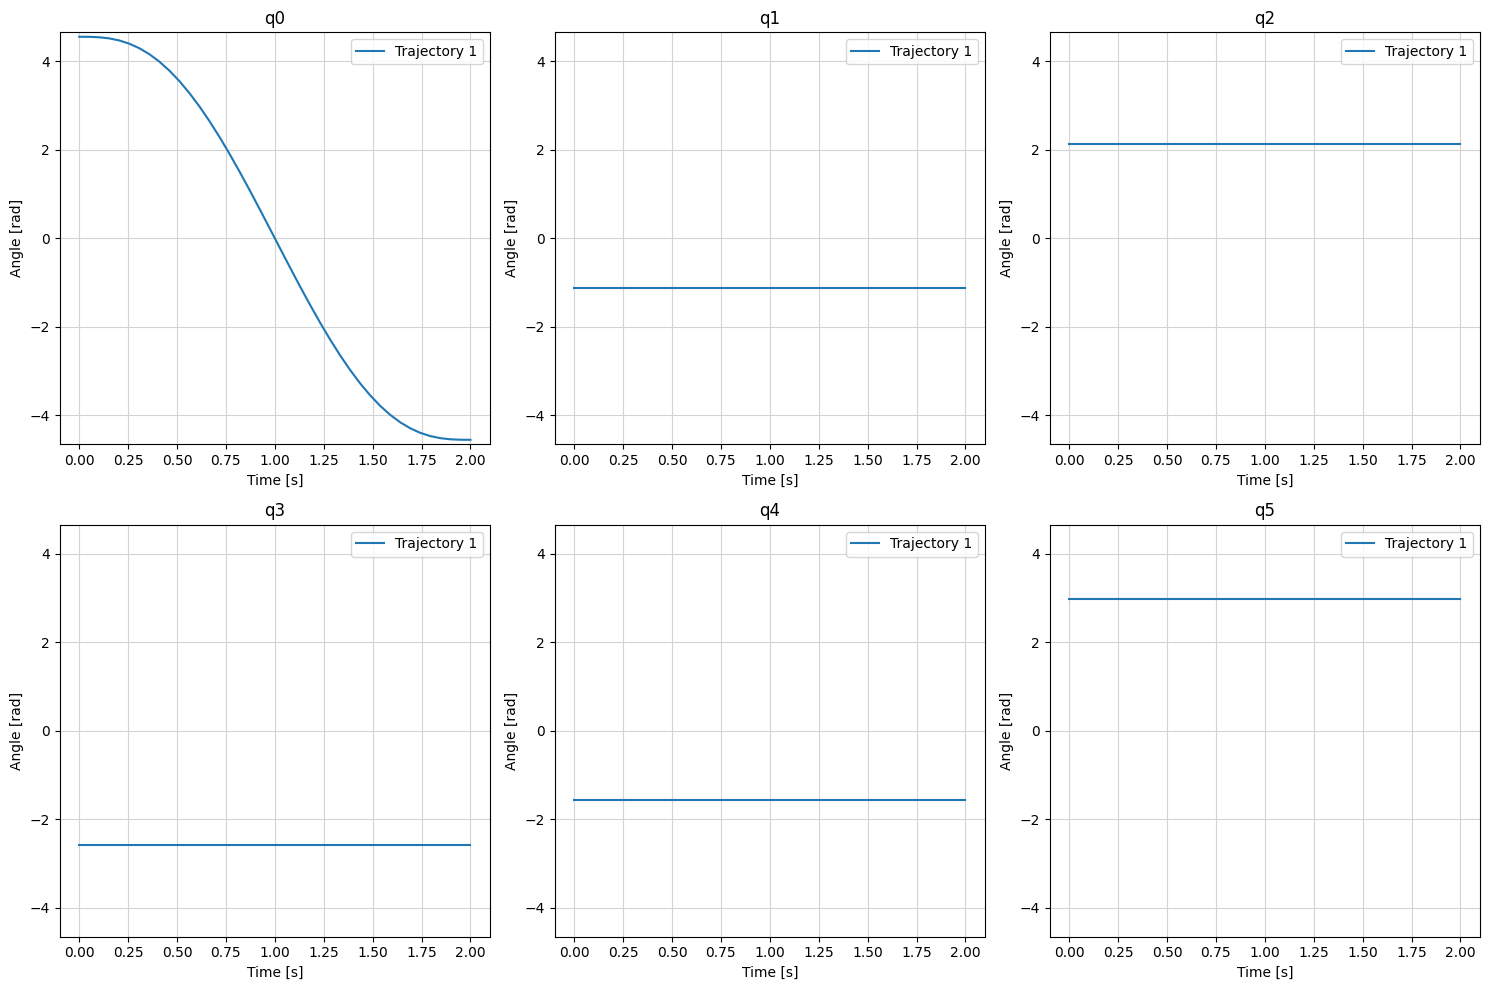

In [5]:
vis.plot_trajectory_2d(traj)

The trajectory is a movement only in the base joint, so we only see the movement in the base joint.

The trajectory is also visualized in the application.

In [7]:
vis.visualize_trajectory(traj)

Visualizing position [39/39]																																						

## Plotting of DT and PT trajectories

This section shows how to plot the trajectories of the DT and PT for a small experiment. The data is taken from a previous experiment and is stored in a CSV file. The data is loaded into a pandas DataFrame and then plotted using the ```RobotVisualizer```.

In [33]:
# read csv files 
df_dt = pd.read_csv('../../data/dt_data/E2_dt.csv', delimiter=' ')
df_pt = pd.read_csv('../../data/pt_data/E2_pt.csv', delimiter=' ')

# get the actual q values
q_dt = np.zeros((len(df_dt),6))
q_pt = np.zeros((len(df_pt),6))

for i in range(6):
    idx = f'actual_q_{i}'
    q_dt[:, i] = df_dt[idx]
    q_pt[:, i] = df_pt[idx]

print(f'Shape of q_dt: {q_dt.shape}')
print(f'Shape of q_pt: {q_pt.shape}')

Shape of q_dt: (1774, 6)
Shape of q_pt: (2142, 6)


Note how the shapes do not align. This is because the monitoring of the robot was started before the experiment was started. However, the the PT and DT are synchronized using the ```output_bit_register_65```. When the experiment starts, this bit is set to 1 and this is when the PT and DT are synchronized.

Therefore, we remove the data in ```q_pt``` up until the first 1 in ```output_bit_register_65```.

In [34]:
# get the start bit index
start_bit_pt = df_pt['output_bit_register_65']
start_bit_pt = start_bit_pt[start_bit_pt == 1].index[0]

# discard the samples in q_pt before the start bit
q_pt = q_pt[start_bit_pt:, :]

print(q_dt.shape)
print(q_pt.shape)

(1774, 6)
(2056, 6)


There is still a mismatch due to the tail of the q_pt data. This is because the PT is stopped after the experiment is stopped, but the DT's estimation is not longer than the experiment. Therefore, the PT will have a longer trajectory than the DT. We can remove the last data points from the PT to align the shapes.

In [35]:
q_pt = q_pt[:q_dt.shape[0], :]
print(q_pt.shape)

(1774, 6)


Now they are aligned perfectly. Note that the this step is not necessary for the visualization below to work. 

Finally, we plot the data using the ```RobotVisualizer```.

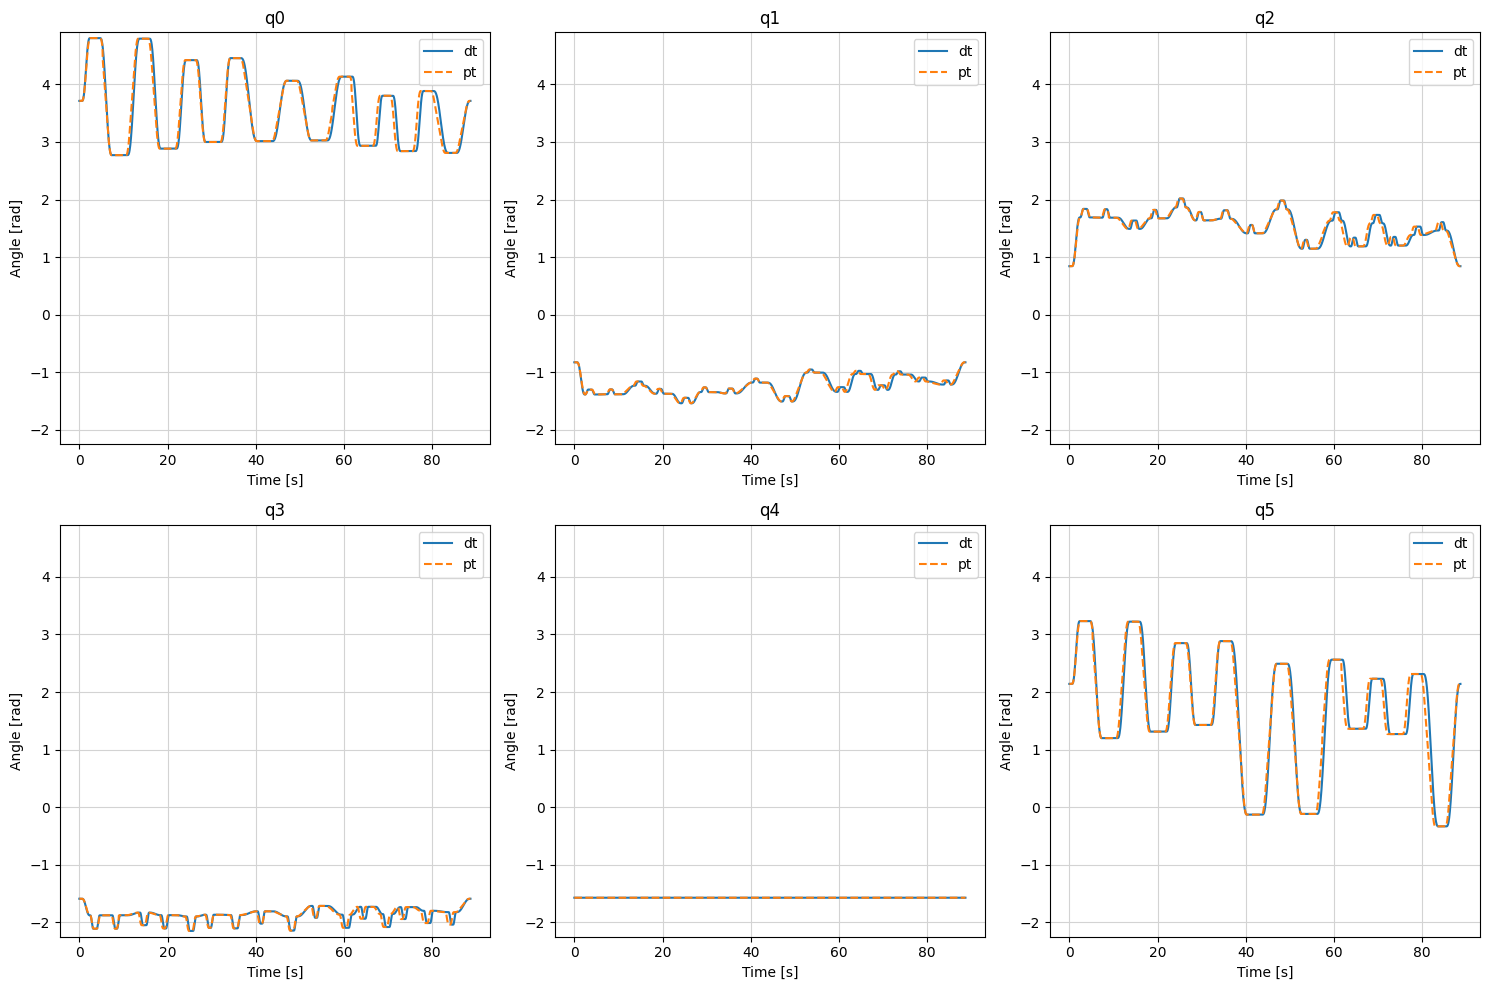

In [36]:
vis.plot_trajectory_2d([q_dt, q_pt], labels=['dt', 'pt'])

Since the most interesting behavior is in joints 0 and 5, we can use the ```joints``` parameter to only plot these joints.

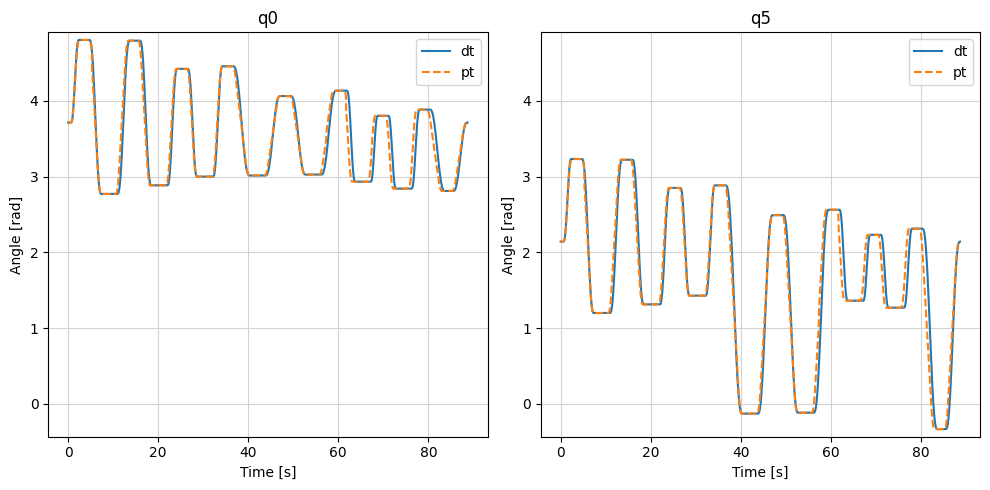

In [37]:
vis.plot_trajectory_2d([q_dt, q_pt], labels=['dt', 'pt'], joints=[0, 5])

As we can see, the PT and DT trajectories are not completely identical. Let's investigate the error between the two trajectories.

We start by calculating the error between the two trajectories and finding the mean.

In [38]:
error = np.abs(q_dt - q_pt)
print(f'Mean error: {np.mean(error)}')

Mean error: 0.045681999242309645


We can also plot the error between the trajectories.

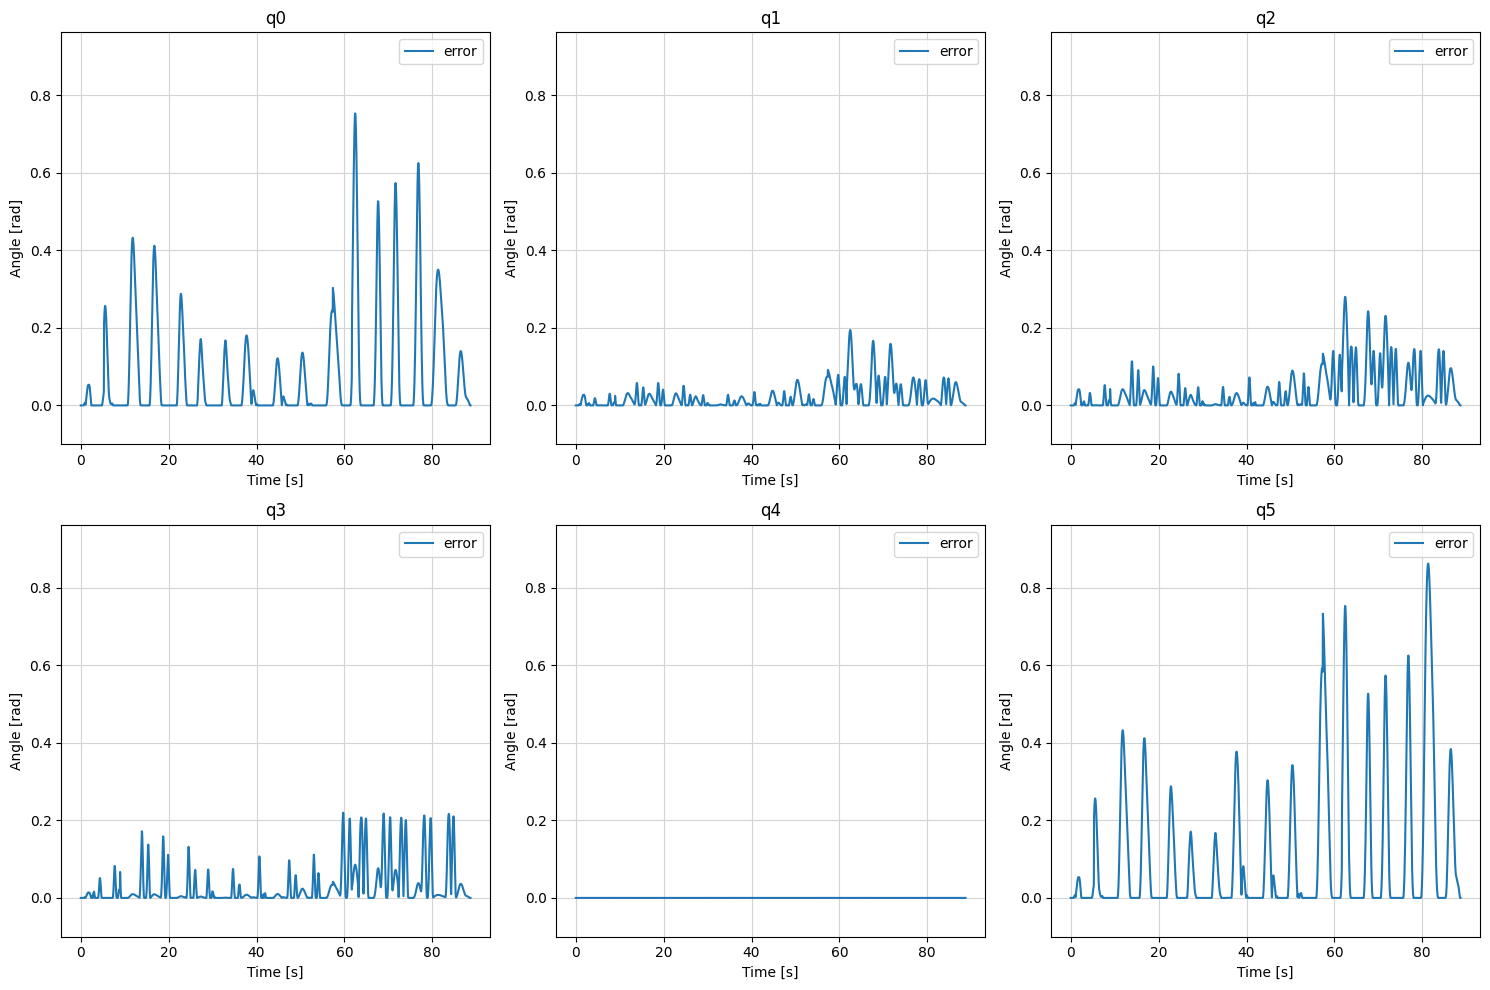

In [24]:
vis.plot_trajectory_2d([error], labels=['error'])

In [ ]:
vis.visualize_trajectory(q_dt)

Visualizing position [932/1773]																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																		

KeyboardInterrupt: 

Always remember to close the application after you are done.

In [39]:
vis.stop_visualization()

Stopping Visualization
